# Import Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style('whitegrid')
%matplotlib inline

# Read Data

In [45]:
customer_df = pd.read_csv('Customer_Churn_Prediction.csv')

### Get data description

In [46]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId        10000 non-null int64
CreditScore       10000 non-null int64
Geography         10000 non-null object
Gender            10000 non-null object
Age               9995 non-null float64
Tenure            9996 non-null float64
Balance           10000 non-null float64
NumOfProducts     9991 non-null float64
HasCrCard         10000 non-null int64
IsActiveMember    10000 non-null int64
Income            9736 non-null float64
Exited            10000 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 937.6+ KB


In [47]:
customer_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Income,Exited
count,1.000000e+04,10000.000000,9995.000000,9996.000000,10000.000000,9991.000000,10000.00000,10000.000000,9736.000000,10000.000000
mean,1.569094e+07,650.528800,38.923762,5.014206,76485.889288,1.530578,0.70550,0.515100,101803.358669,0.207800
std,7.193619e+04,96.653299,10.487039,2.891813,62397.405202,0.581704,0.45584,0.499797,55468.998898,0.405753
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,15000.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,52500.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,102500.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.250000,127644.240000,2.000000,1.00000,1.000000,150000.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,197500.000000,1.000000


In [48]:
customer_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Income,Exited
0,15634602,619,France,Female,42.0,2.0,0.00,1.0,1,1,100000.0,0
1,15647311,608,Spain,Female,41.0,1.0,83807.86,1.0,0,1,112500.0,0
2,15619304,502,France,Female,42.0,8.0,159660.80,3.0,1,0,112500.0,1
3,15701354,699,France,Female,39.0,1.0,0.00,2.0,0,0,92500.0,0
4,15737888,850,Spain,Female,43.0,2.0,125510.82,1.0,1,1,77500.0,0


# Data Preparation/Cleansing

In [49]:
 # delet customerId column as it has no impact on the dependent variable.
customer_df_without_Id = customer_df.drop(['CustomerId'], axis=1)
customer_df_without_Id.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Income,Exited
0,619,France,Female,42.0,2.0,0.00,1.0,1,1,100000.0,0
1,608,Spain,Female,41.0,1.0,83807.86,1.0,0,1,112500.0,0
2,502,France,Female,42.0,8.0,159660.80,3.0,1,0,112500.0,1
3,699,France,Female,39.0,1.0,0.00,2.0,0,0,92500.0,0
4,850,Spain,Female,43.0,2.0,125510.82,1.0,1,1,77500.0,0


### Categorical data

In [50]:
numeric_customer_df =pd.get_dummies(customer_df_without_Id)
numeric_customer_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Income,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2.0,0.00,1.0,1,1,100000.0,0,1,0,0,1,0
1,608,41.0,1.0,83807.86,1.0,0,1,112500.0,0,0,0,1,1,0
2,502,42.0,8.0,159660.80,3.0,1,0,112500.0,1,1,0,0,1,0
3,699,39.0,1.0,0.00,2.0,0,0,92500.0,0,1,0,0,1,0
4,850,43.0,2.0,125510.82,1.0,1,1,77500.0,0,0,0,1,1,0


For our categorical data I first created dummy variables, this enables us to create new attributes according to the number of classes present in the categorical variables. We in fact translate our string to number to be understandable for our ML algorithm, because ML algorithm will understand only numbers not objects

### Missing values

In [51]:
# determine which columns has missing values
customer_df_without_Id.isnull().any()

CreditScore       False
Geography         False
Gender            False
Age                True
Tenure             True
Balance           False
NumOfProducts      True
HasCrCard         False
IsActiveMember    False
Income             True
Exited            False
dtype: bool

In [52]:
# count number of missing values in each column
numeric_customer_df.isnull().sum().sort_values(ascending=False)

Income               264
NumOfProducts          9
Age                    5
Tenure                 4
Gender_Male            0
Gender_Female          0
Geography_Spain        0
Geography_Germany      0
Geography_France       0
Exited                 0
IsActiveMember         0
HasCrCard              0
Balance                0
CreditScore            0
dtype: int64

In [53]:
#check how many rows with Nan values.
print(len(numeric_customer_df[numeric_customer_df.isna().any(axis=1)]))

282


In [54]:
missing_columns = ["Age", "Tenure", "NumOfProducts", "Income"]

### Imputation for missing values treatment

In [55]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df
for feature in missing_columns:
    numeric_customer_df[feature + '_imp'] = numeric_customer_df[feature]
    numeric_customer_df = random_imputation(numeric_customer_df, feature)

In [56]:
numeric_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
CreditScore          10000 non-null int64
Age                  9995 non-null float64
Tenure               9996 non-null float64
Balance              10000 non-null float64
NumOfProducts        9991 non-null float64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
Income               9736 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
Age_imp              10000 non-null float64
Tenure_imp           10000 non-null float64
NumOfProducts_imp    10000 non-null float64
Income_imp           10000 non-null float64
dtypes: float64(9), int64(4), uint8(5)
memory usage: 1.0 MB


In [57]:
# Deterministic regression imputation.
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = numeric_customer_df[feature + '_imp']
    parameters = list(set(numeric_customer_df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = numeric_customer_df[parameters], y = numeric_customer_df[feature + '_imp'])
    deter_data.loc[numeric_customer_df[feature].isnull(), "Det" + feature] = model.predict(numeric_customer_df[parameters])[numeric_customer_df[feature].isnull()]

In [58]:
numeric_customer_df.isna().sum()

CreditScore            0
Age                    5
Tenure                 4
Balance                0
NumOfProducts          9
HasCrCard              0
IsActiveMember         0
Income               264
Exited                 0
Geography_France       0
Geography_Germany      0
Geography_Spain        0
Gender_Female          0
Gender_Male            0
Age_imp                0
Tenure_imp             0
NumOfProducts_imp      0
Income_imp             0
dtype: int64

In [59]:
imputed_numeric_customer_df = numeric_customer_df.drop(['Age','Tenure','NumOfProducts','Income'], axis=1)

Next, I drop the columns with missing values and keep the impute columns and creat a new clean datase

In [60]:
imputed_numeric_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null int64
Balance              10000 non-null float64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
Age_imp              10000 non-null float64
Tenure_imp           10000 non-null float64
NumOfProducts_imp    10000 non-null float64
Income_imp           10000 non-null float64
dtypes: float64(5), int64(4), uint8(5)
memory usage: 752.0 KB


In [61]:
#check that we don't have any missing values.
imputed_numeric_customer_df.isnull().sum().sort_values(ascending=False)

Income_imp           0
NumOfProducts_imp    0
Tenure_imp           0
Age_imp              0
Gender_Male          0
Gender_Female        0
Geography_Spain      0
Geography_Germany    0
Geography_France     0
Exited               0
IsActiveMember       0
HasCrCard            0
Balance              0
CreditScore          0
dtype: int64

There are not any missing values in our categorical data, otherwise we would need to impute those first. As we want to use Linear Regression to impute the missing values for numeric data, we first need to convert categorical data to dummy variables because the numerical data can be easily handled in regression models, but we can’t use categorical data directly, it needs to be transformed in some way. There are many rows with missing values in our dataset (264 rows in “Income” column, 9 rows in “NumOfProducts”, 5 rows in “Age” and 4 rows in “Tenure” column), so we cannot just delete the rows with missing values, because if we delete the data point containing missing data (List wise deletion), we will end up with a small number of samples to train our learning model and thus accuracy would be of concern. We can see that the “Income” column has the greatest number of missing values. If we want to impute the missing data with for example a common value we might underestimate or overestimate it. we might add some bias to our estimation as a result we will use Linear regression imputation. When we have multiple variables with missing values, we can't just directly use Regression Imputation to impute one of them as the predictors contain missing data themselves. By initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively we can impute one variable without imputing another. I used Deterministic Regression Imputation, in this method the missing data will be replaced with the values predicted in our regression model and repeat this process for each variable.

# Descriptive statistic

In [62]:
#descriptive statistics summary of our dataset.
imputed_numeric_customer_df.describe()

,CreditScore,Balance,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_imp,Tenure_imp,NumOfProducts_imp,Income_imp
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,0.70550,0.515100,0.207800,0.501400,0.250900,0.247700,0.454300,0.545700,38.92450,5.013500,1.530400,101920.000000
std,96.653299,62397.405202,0.45584,0.499797,0.405753,0.500023,0.433553,0.431698,0.497932,0.497932,10.48745,2.891808,0.581644,55463.309655
min,350.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.00000,0.000000,1.000000,15000.000000
25%,584.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.00000,3.000000,1.000000,52500.000000
50%,652.000000,97198.540000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,37.00000,5.000000,1.000000,102500.000000
75%,718.000000,127644.240000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,44.00000,7.000000,2.000000,150000.000000
max,850.000000,250898.090000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.00000,10.000000,4.000000,197500.000000


In [63]:
imputed_numeric_customer_df.head(3)

,CreditScore,Balance,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_imp,Tenure_imp,NumOfProducts_imp,Income_imp
0,619,0.00,1,1,0,1,0,0,1,0,42.0,2.0,1.0,100000.0
1,608,83807.86,0,1,0,0,0,1,1,0,41.0,1.0,1.0,112500.0
2,502,159660.80,1,0,1,1,0,0,1,0,42.0,8.0,3.0,112500.0


# Outliers

In [64]:
#Discover outliers with IQR 
Q1 = imputed_numeric_customer_df.quantile(0.25)
Q3 = imputed_numeric_customer_df.quantile(0.75)
IQR = Q3 - Q1
imputed_numeric_customer_df_withoutOutlier_By_IQR = imputed_numeric_customer_df[~((imputed_numeric_customer_df < (Q1 - 1.5 * IQR)) |(imputed_numeric_customer_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(imputed_numeric_customer_df.shape)
print(imputed_numeric_customer_df_withoutOutlier_By_IQR.shape)

(10000, 14)
(5657, 14)


In [65]:
#Discover outliers with mathematical function Z-Score-
imputed_numeric_customer_df_withoutOutlier_by_Zscore= dataset[(np.abs(stats.zscore(imputed_numeric_customer_df)) < 3).all(axis=1)]
print(imputed_numeric_customer_df.shape)
print(imputed_numeric_customer_df_withoutOutlier_by_Zscore.shape)

(10000, 14)
(9799, 14)


I checked 2 methods to detect the outliers of my dataset: 1) Inter quartile 2) Z-score. But I applied Z-score to filter my dataset. Because If I use IQR, with ratios in range of 1.5 to 3, to filter the outliers in my dataset, it will approximately delete almost half of my data which means we won’t have enough data to train our model and this will in turn negatively affect the accuracy of my prediction later on, however by using Z-Score to filter the outliers of my dataset, I just lose 201 rows of my data. 

# Data Visualization

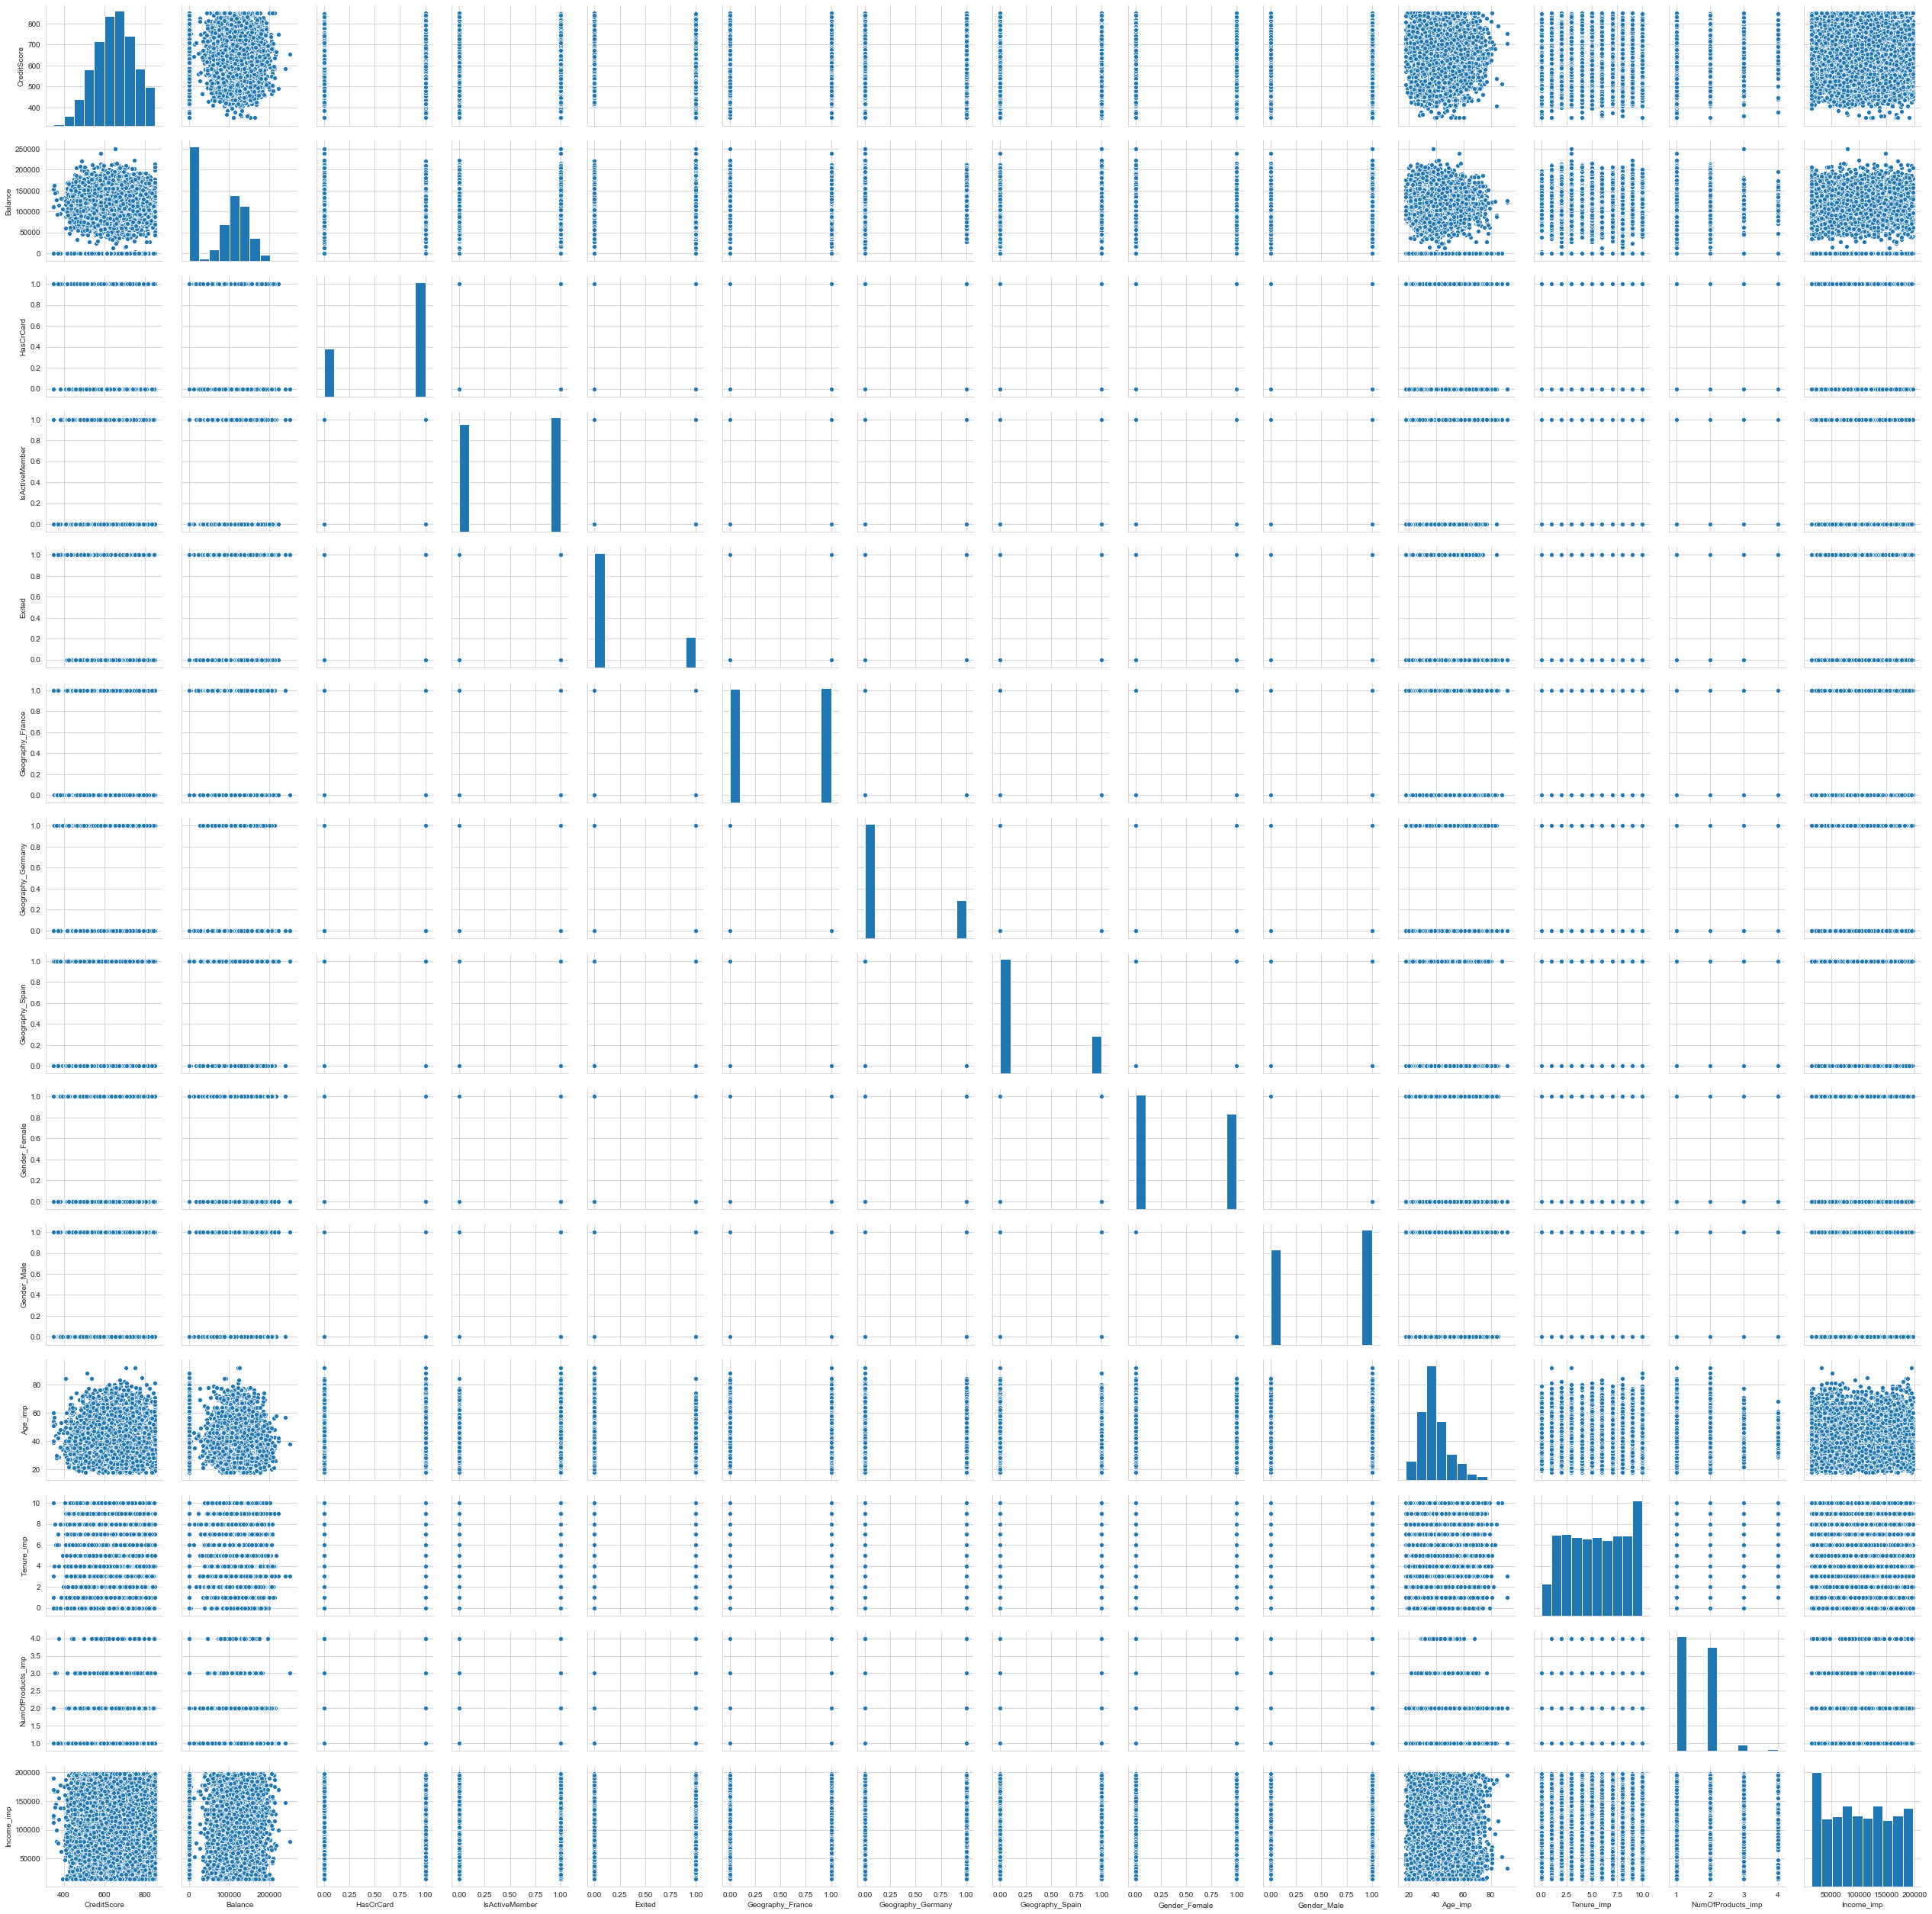

In [66]:
#visualize dataset and dataset without outlier using pairplot.
sns.pairplot(imputed_numeric_customer_df)

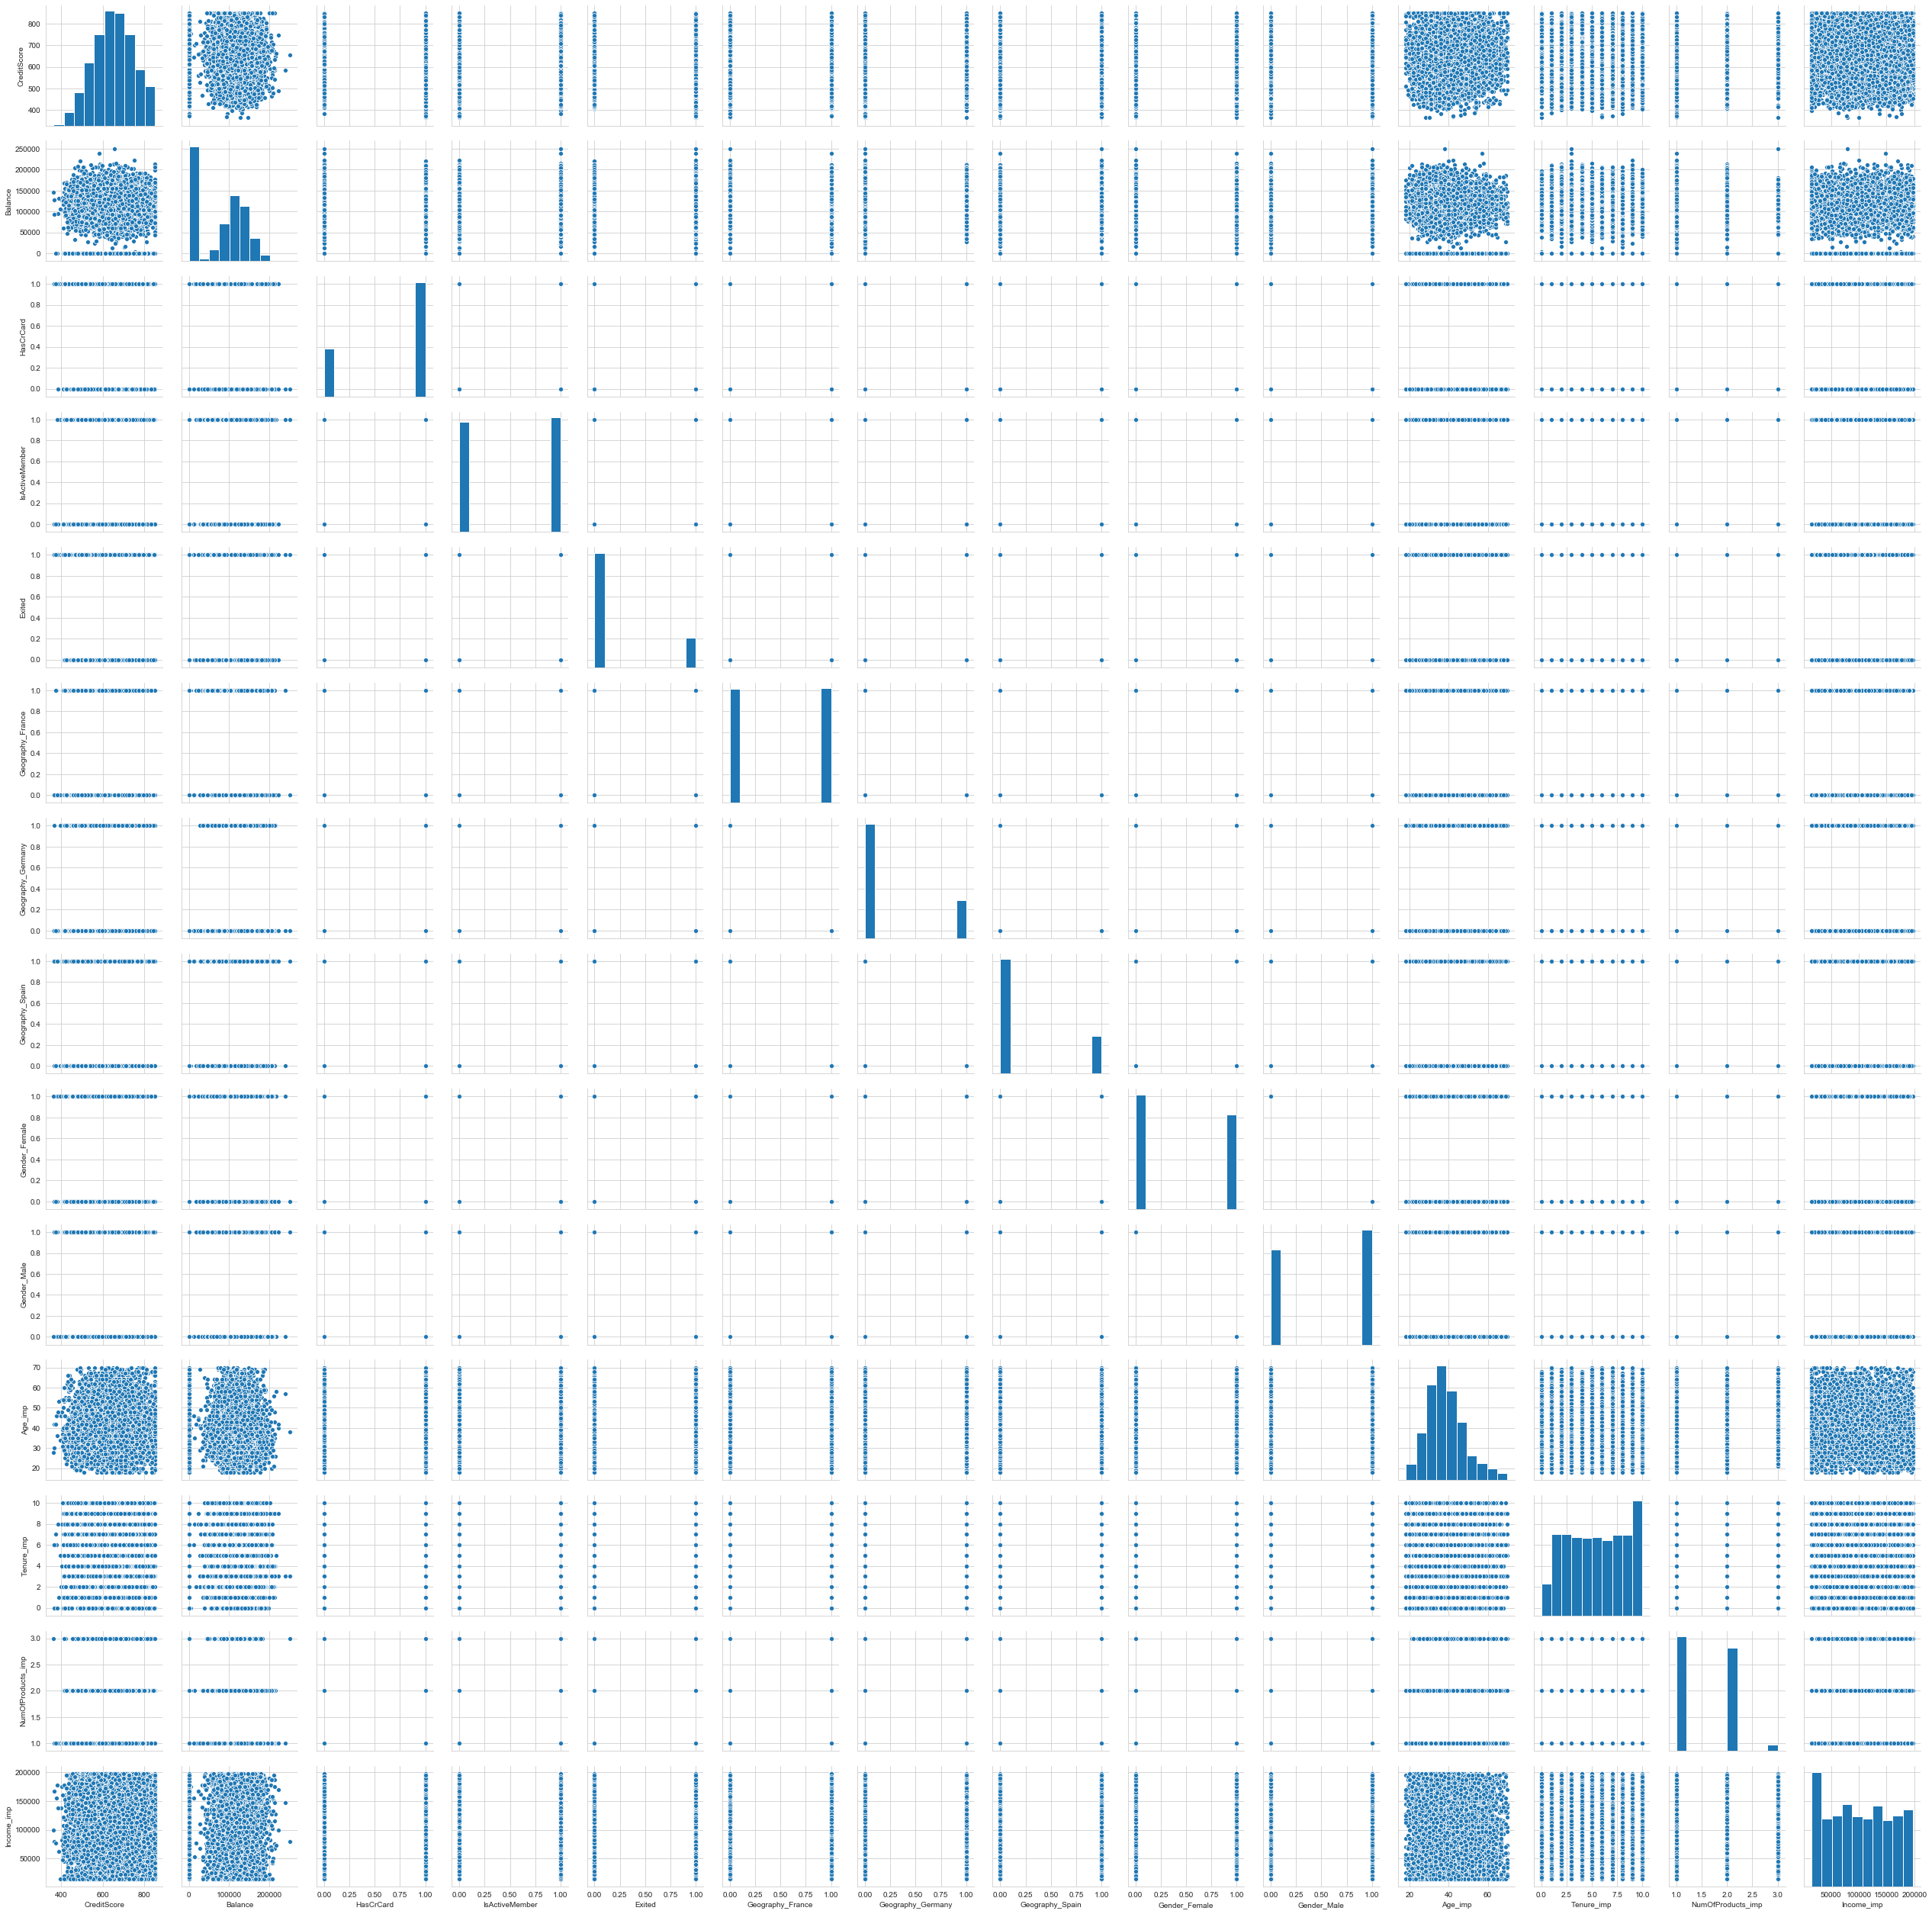

In [67]:
sns.pairplot(imputed_numeric_customer_df_withoutOutlier_by_Zscore)

I also use pair plot to show the scatter plots of variables before and after filtering of outlier in my dataset and make detection of outlier easier.

### Relation With Age

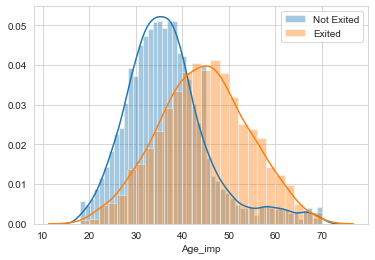

In [68]:
df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==0].reset_index()
sns.distplot(df['Age_imp'], label = 'Not Exited')

df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==1].reset_index()
sns.distplot(df['Age_imp'], label = 'Exited')
plt.legend()
plt.show()

Relation between “Age” and “Exited”: We can see in the plot that the distribution of exited people is much wider than not exited people, which means that the variety of exited people is much higher than not exited, comparing the distributions side by side and the fact that the 'exited' distribution tends more to the right (i.e. older ages) shows that older people tend to leave the bank much more than younger people. The average age of people who stayed at bank is around 35 years old, however this number for exited people is approximately 43 years old. All in all, this shows that age DOES have a considerable impact of the exiting status of the bank customers and must be used as a predictor.

### Relation With credit score

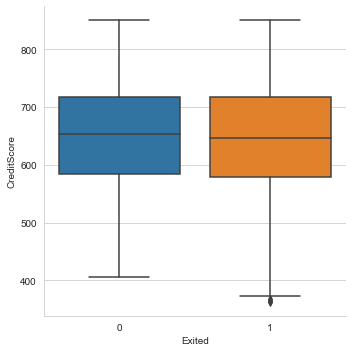

In [69]:
sns.catplot(x='Exited', y='CreditScore', data=imputed_numeric_customer_df_withoutOutlier_by_Zscore, kind='box', estimator = np.median)

Relation between “Credit score” and “Exited”: The histogram related to credit score shows relatively the same distribution for both exited and not exited people. To some extent, the not Exited plot move to the right that shows people with higher credit score are the current customer. I also use box plot of credit score for both exited and not exited customer to get more insight. It shows that the median of credit score for current customer is higher than exited customer and shows outlier for the exited customer. It may bank policy to get rid of people with lower credit score, so the number of exited people with lower credit score is higher than current customer. 

### Relation With Income

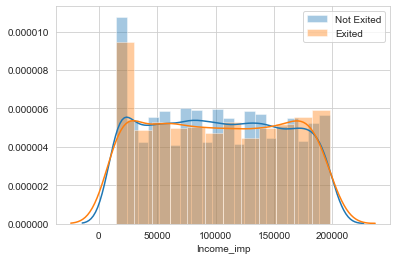

In [70]:
df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==0].reset_index()
sns.distplot(df['Income_imp'], label = 'Not Exited')

df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==1].reset_index()
sns.distplot(df['Income_imp'], label = 'Exited')
plt.legend()
plt.show()

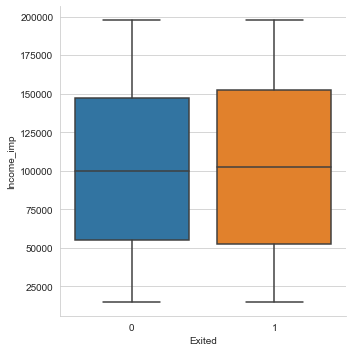

In [71]:
sns.catplot(x='Exited', y='Income_imp', data=imputed_numeric_customer_df_withoutOutlier_by_Zscore, kind='box', estimator = np.median)

Relation between “Income” and “Exited”: It shows that the median income of people who exited the bank is slightly higher than current customers. And higher income earners are more popular (i.e. within the 1st and 3rd quantile) among those who have exited. All in all, income can also be an impactful factor on customer exit.

### Relation With Balance

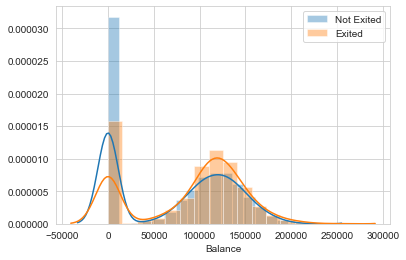

In [72]:
df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==0].reset_index()
sns.distplot(df['Balance'], label = 'Not Exited')

df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==1].reset_index()
sns.distplot(df['Balance'], label = 'Exited')
plt.legend()
plt.show()

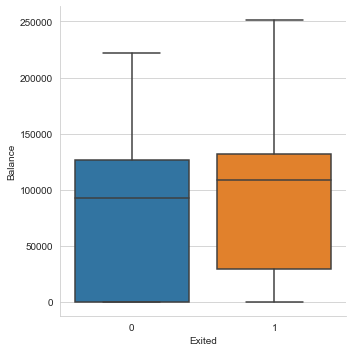

In [73]:
sns.catplot(x='Exited', y='Balance', data=imputed_numeric_customer_df_withoutOutlier_by_Zscore, kind='box', estimator = np.median)

Relation between “Income” and “Exited”: It shows that the median income of people who exited the bank is slightly higher than current customers. And higher income earners are more popular (i.e. within the 1st and 3rd quantile) among those who have exited. All in all, income can also be an impactful factor on customer exit.

### Relation With Has credit card

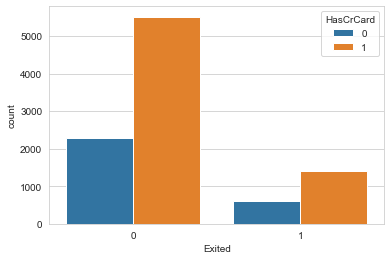

In [74]:
sns.countplot(x='Exited',hue = 'HasCrCard',data= imputed_numeric_customer_df_withoutOutlier_by_Zscore)

In [75]:
def calculate_exited_ratio(df, col, val):
    Exited_people = df.loc[(df[col]== val)&(df["Exited"]==1)]
    all_people= df.loc[(df[col]== val)] 
    return ((len(Exited_people)/len(all_people))*100)

In [76]:
print('percentage of exited people without credit card is: ', calculate_exited_ratio(imputed_numeric_customer_df_withoutOutlier_by_Zscore, 'HasCrCard', 0))
print('percentage of exited people with credit card is: ', calculate_exited_ratio(imputed_numeric_customer_df_withoutOutlier_by_Zscore, 'HasCrCard', 1))

percentage of exited people without credit card is:  20.748181503290613
percentage of exited people with credit card is:  20.25462962962963


### Relation With Active Member

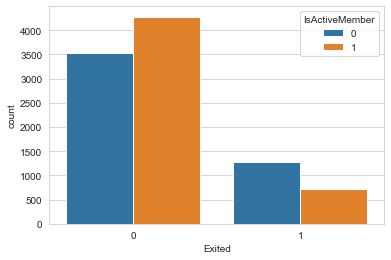

In [77]:
sns.countplot(x='Exited', hue="IsActiveMember", data= imputed_numeric_customer_df_withoutOutlier_by_Zscore)

Relation between “IsActiveMember” and “Exited”: It is clear from the count plot that among those still with the bank, more of them are active members, while on the contrary, among those who have left the bank, there are more inactive members. This is probably as expected that inactive customers that do not have much interactions and activities are more likely to leave the bank. All in all, the activeness of the customer can also be an impactful predictor for whether exit the bank or not.

### Relation With Number of products

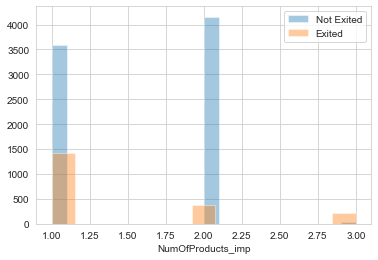

In [78]:
df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==0].reset_index()
sns.distplot(df['NumOfProducts_imp'], label = 'Not Exited',kde=False)

df = imputed_numeric_customer_df_withoutOutlier_by_Zscore.loc[imputed_numeric_customer_df['Exited']==1].reset_index()
sns.distplot(df['NumOfProducts_imp'], label = 'Exited',kde=False)
plt.legend()
plt.show()

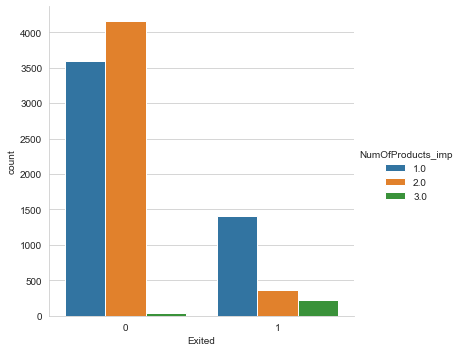

In [79]:
sns.catplot(x='Exited', hue='NumOfProducts_imp', data=imputed_numeric_customer_df_withoutOutlier_by_Zscore, kind='count')

Relation between “NumberOfproducts” and Exited: The dist plot shows that people with more than 2 number of products are more likely to exit the bank compared to the people with just one or two number of products. This can be seen in the count plot as well. In addition, the count plot shows that customers who stay with the bank usually have 1 or 2 products only. Also it seems like comparing people with 1 and 2 products, people with 1 product are more likely to leave the bank rather than people with 2 products.

### Relation With Tenure

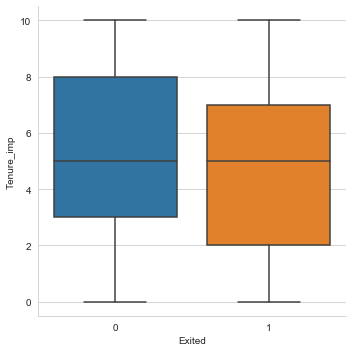

In [80]:
sns.catplot(x='Exited', y='Tenure_imp', data=imputed_numeric_customer_df_withoutOutlier_by_Zscore, kind='box', estimator = np.median)

Relation between “Tenure” and “Exited”: Although the median tenure for both current and exited customers are the same, the variance in tenure of current customer are considerably lower than that of exited customers.as a result if we know the person is a current customer, their tenure can be estimated more confidently compared to the case of exited customers.

### Relation with Geography

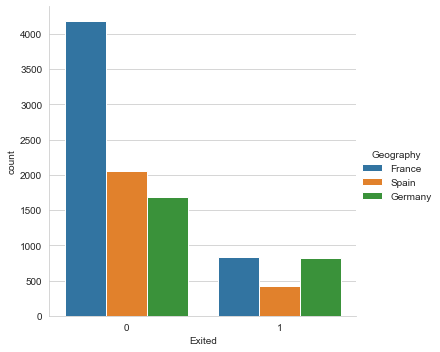

In [81]:
sns.catplot(x='Exited', hue ='Geography', data=customer_df_without_Id, kind='count' )

In [82]:
print('percentage of exited people in Germany: ',calculate_exited_ratio(customer_df_without_Id, 'Geography', "Germany"))
print('percentage of exited people in France: ',calculate_exited_ratio(customer_df_without_Id, 'Geography', "France"))
print('percentage of exited people in Spain: ',calculate_exited_ratio(customer_df_without_Id, 'Geography', "Spain"))

percentage of exited people in Germany:  32.841769629334394
percentage of exited people in France:  16.59353809333865
percentage of exited people in Spain:  17.036737989503433


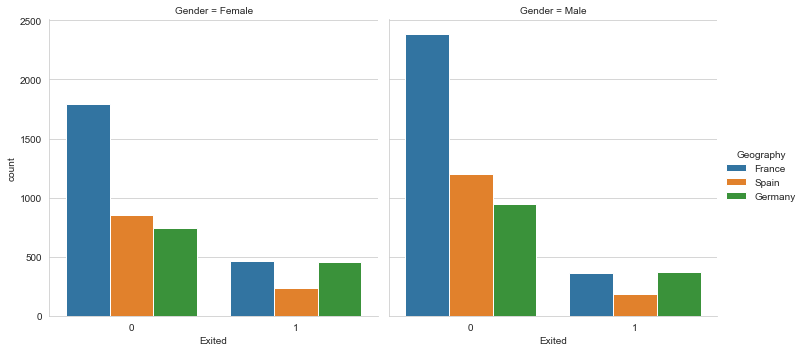

In [83]:
sns.catplot(x='Exited', hue ='Geography', col='Gender', data=customer_df_without_Id, kind='count' )

Relation between “Geography” and “Exited”: Based on the count plot we found that the ratio of exited people for Spain and France are relatively the same but for Germany it shows higher rate. For showing exact values, I have used my previously defined function which shows that if people are German it is more likely to leave the bank as the ratio for Exited people is much higher than 2 other countries. Finally, to see a three-dimensional view of the relations between exiting the bank, geography and gender, the last count plots show that although the relations between geography and exiting the bank is generally similar for both genders, it can be seen that the ratio of exited customers to remaining customers ae generally higher for female compared to male customers in all countries. In other words, females in all countries may be more likely to leave the bank compared to males. This will be also investigated separately in relationship between Gender and Exited.

### Relation with Gender

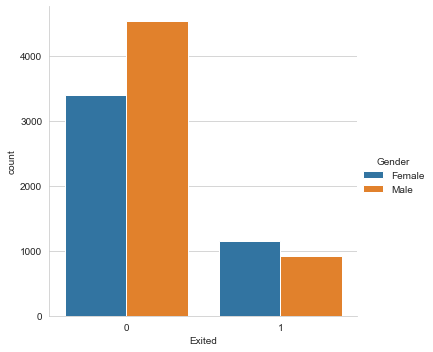

In [84]:
sns.catplot(x='Exited', hue ='Gender', data=customer_df_without_Id, kind='count' )

Relation between “Gender” and “Exited”: The graph shows that the number of women who left the bank is higher than men, so we can say if the customer is a woman, it is more likely to exit the bank compare to a man. This also confirms our findings in the compound count plot in previous section.

## Heatmap plot

In [85]:
imputed_numeric_customer_df_withoutOutlier_by_Zscore.columns

Index(['CreditScore', 'Balance', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'Age_imp', 'Tenure_imp',
       'NumOfProducts_imp', 'Income_imp'],
      dtype='object')

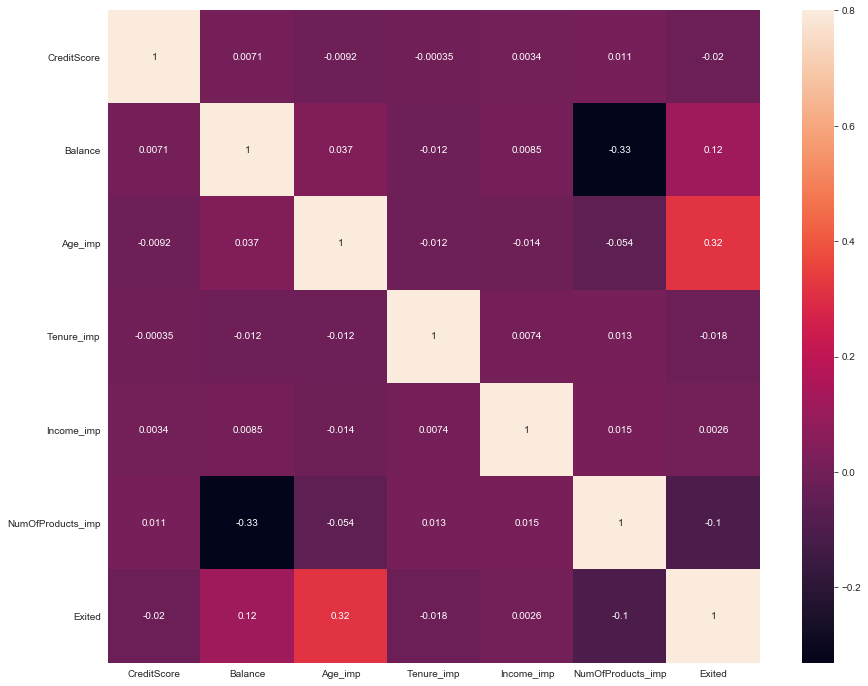

In [86]:
numericCols = ['CreditScore', 'Balance', 'Age_imp', 'Tenure_imp', 'Income_imp', 'NumOfProducts_imp', 'Exited']
corrmat =imputed_numeric_customer_df_withoutOutlier_by_Zscore[numericCols].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Correlation heatmap: By looking at heatmap we can see that Age Balance and number of products features have highest correlations (although not significant in total) with Exited feature among all features. The Age and Balance have positive correlation, that is the higher age/balance relates to Exited = 1 (i.e. customer left the bank) and the lower values of age/balance relates to Exited = 0 (customer stays with the bank), whereas number of products have an inverse relation, that is the higher/lower number of products mostly relate to customers left/stayed with the bank respectively.
There is also another important observation in the correlation heatmap, which shows that there is minimal multi-collinearity among the predictors. This is a necessary assumption when Linear regression (or classifiers based on LR) are to be used for modelling, although some other models (like tree-based models) are immune to this.


# Modeling

The bank has identified several potential factors that may impact the loyalty of customers. I have decided to model these factors as independent variables (i.e. predictors) in my modelling. These factors include credit card score, the balance, the number of products and so on which are information about a customer of the bank and based on these independent variables we are going to predict a binary outcome, i.e. customer loyalty.

I have decided to model this problem as a supervised machine learning classification problem. As mentioned above, the target variable to be predicted is the loyalty of customers, i.e. whether a customer will stay with or leave the bank. Hence, this variable can be modelled as a binary variable, obtaining value of 1 meaning the customer will leave the bank and 0 meaning the customer will stay with the bank. Modelling the target with a binary variable makes this a classification problem.  

# Create Train & Test Data

In this step, I prepared my train data (the data that is used to train a machine learning classification model) and test data (the dataset to be used to predict the customer loyalty using our trained model on previously unseen data). 

In [87]:
imputed_numeric_customer_df_withoutOutlier_by_Zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          9799 non-null int64
Balance              9799 non-null float64
HasCrCard            9799 non-null int64
IsActiveMember       9799 non-null int64
Exited               9799 non-null int64
Geography_France     9799 non-null uint8
Geography_Germany    9799 non-null uint8
Geography_Spain      9799 non-null uint8
Gender_Female        9799 non-null uint8
Gender_Male          9799 non-null uint8
Age_imp              9799 non-null float64
Tenure_imp           9799 non-null float64
NumOfProducts_imp    9799 non-null float64
Income_imp           9799 non-null float64
dtypes: float64(5), int64(4), uint8(5)
memory usage: 1.1 MB


# Avoid dummy variable trap

As part of preparation of train and test datasets, one very important thing to consider for this dataset is that it includes categorical variables. In the previous steps (as presented in the previous assignment), I converted categorical variable to dummy variables. However, we need to be careful about the so called “dummy variable trap”. Briefly, dummy variable trap states in the conversion of categorical variables to dummy variables one must ensure that the number of dummy variable columns are one less that the number of unique values of the correspondent categorical variable. For example, consider the “gender” categorical variable. Originally, the gender in the dataset is either “Male” or “Female”. So, when creating a dummy variable column for “Male”, the values of this column will be one, if the customer is male, zero, if the customer is not male (i.e. female). This means that we can model both values using only one dummy variable column. If we add a “Female” column, the values will be the opposite of the values in “Male” column, and this creates multicollinearity between “Male” and “Female” columns. This can be generalised to any number finite number of classes of categorical variable (e.g. three countries so 3-1=2 dummy variable columns). Multicollinearity is a factor that can, sometime significantly, negatively affect the prediction power of machine learning models, especially techniques that have an underlying linear prediction mechanism. Therefore, it is always advised as Machine Learning best practice to avoid multicollinearity in the dataset. Below is how I have done this in the code:

In [88]:
dataSet_Reduced_Dummies = imputed_numeric_customer_df_withoutOutlier_by_Zscore.drop(["Geography_France","Gender_Male"],axis=1)
dataSet_Reduced_Dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          9799 non-null int64
Balance              9799 non-null float64
HasCrCard            9799 non-null int64
IsActiveMember       9799 non-null int64
Exited               9799 non-null int64
Geography_Germany    9799 non-null uint8
Geography_Spain      9799 non-null uint8
Gender_Female        9799 non-null uint8
Age_imp              9799 non-null float64
Tenure_imp           9799 non-null float64
NumOfProducts_imp    9799 non-null float64
Income_imp           9799 non-null float64
dtypes: float64(5), int64(4), uint8(3)
memory usage: 1.1 MB


In [89]:
#Select the X matrix of features as predictor and y vector as dependent variable
random_state = 0

X = dataSet_Reduced_Dummies.loc[:, ['CreditScore', 'Balance', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 
                                    'Geography_Spain', 'Gender_Female', 'Age_imp', 'Tenure_imp', 'NumOfProducts_imp', 
                                    'Income_imp']].values

y = dataSet_Reduced_Dummies.loc[:, "Exited"].values

I split the whole dataset into train and test datasets. The dataset (after removing outliers in the previous steps) has now 9798. Because the size of the dataset is relatively large, I decided to use 75% of the data for training and the remaining 25% for test. In addition, I used the readily available function for this purpose from sklearn package.

In [90]:
from sklearn.model_selection import train_test_split

""" split our data set, I use test size of 25% which means 2450 of data to be used for test and 7349 of data is used for traing 
our ML algorithm."""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
print("size of the train set is: ", len(X_train))
print("size of the test set is: ", len(X_test))

size of the train set is:  7349
size of the test set is:  2450


## Scaling of numeric variable

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). For instance many elements used in the objective function of a learning algorithm assume that all features are centred around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
In my dataset, I use standard scaler function from sklearn package to perform this process as follow:

Note that in the below code, we first fitted the standard scaler object to train data and used it to transform both train and test data to make sure the same transformation is applied to both test and train data.

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# standardising our both train and test dataset.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model selection 

I decided to use 5 different ML algorithms as predictors (in this case, classifiers) to model my dataset including Decision tree, Random Forest, Logistic regression, KNN and Naïve Bayes from sklearn package. I created a function to collect all the classifiers in a list to be able to use them later in Cross Validation loop to find the best performing one.

In [92]:
# import required ML algorithm from SKlearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#created a function to collect all the classifiers in a list to be able to use them later in Cross Validation loop 
#to find the best performing one

def createEstimators():
    random_state = 0
    estimators = []
    
# creat an object of each class and append it to my list.

    estimators.append(DecisionTreeClassifier(random_state=random_state))
    estimators.append(RandomForestClassifier(random_state=random_state))
    estimators.append(LogisticRegression(random_state=random_state))
    estimators.append(KNeighborsClassifier())
    estimators.append(GaussianNB())
    
# return the classifier and their abbriviated names
    estNames = ["DT", "RF", "LR", "KNN", "NB"]
    return [estimators, estNames]

# Cross Validation

One of the fundamental concepts in machine learning is the concept of overfitting. overfitting is when during the training of a model on the training set, the model learns the noise in the data. In other words, the model mistakenly picks up and learns the patterns that are irrelevant (i.e. noise) and may not appear on any other similar datasets. This causes the model to be able to achieve a good performance on training set (fitting the training set very efficiently) but fails to have good prediction performance for any unseen data. It is worth noting that the opposite of this situation, where the model fails to pick up and learn the relevant and important patterns in the data and hence have poor fitting performance on both train and test data, is called “underfitting”. Both overfitting and underfitting are undesirable effects that a machine learning practitioner would like to avoid as much as possible in the modelling phase.
An important technique to help identify if a model is overfitting (or underfitting) the training data and hence will later have poor prediction performance on test data is to perform Cross Validation (CV). Note that CV is a method to identify if overfitting/underfitting is likely to happen, but not a technique to avoid it. Other methods are available to avoid overfitting like regularisation. 
In CV, the idea is that instead of training the data on the whole training set in one step and then predict on the test set, the training set itself is split into several folds, and in an iterative manner, every time the model is trained on all but one of these folds and then the trained model is used to predict on the remaining fold. This is repeated for all the folds to be used as a test fold exactly once. For example, in a 5-fold CV, the dataset is randomly split into 5 partitions, and in the first iteration, the model is trained on fold 1 to 4, and then is tested on folds 5, the second iteration, the model is trained on fold 2 to 5 and is tested on fold 1, and so on. Finally, after completing 5 iterations, there are 5 different accuracy numbers (whatever the desired accuracy metric is set to be used by the practitioner). If some of the accuracies are high but some are low, it means that the model is likely to suffer from overfitting and if the accuracies are consistently low then it is likely that the model is not efficient enough and suffers from underfitting. 
After CV loop, a good way to select a model is to look at the average and the standard deviation of the accuracies achieved in CV. The idea is to choose the model with highest average accuracy and lowest standard deviation of accuracies. If the average is low, then the model is poor performing, if the average is high, but the standard deviation is also high, then there is risk of overfitting and finally if the average accuracies are high enough and the standard deviation of accuracies are low enough, then the model is a good performing model.

In my code, I have done this through two custom functions, using the core CV functionality of sklearn package, but with additional visualisation to allow selection of best model. Below is the code I implemented

In [93]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#creat a function to make a barplot of each ML algorithm performance
def plotCVResults(data, stdData, title, figNum):
    plt.figure(figNum)
    g = sns.barplot("CrossValMeans", "Algorithm", data = data, palette="Set3", 
                    orient = "h", **{'xerr':stdData})
    g.set_title(title)
    
# this function use crossvalidation to train each ML algorithm on 10 fold and with the ability to use doffernt scoring method.
    
def obtainCVRegressionResults(X_train, y_train, scorer, estNames, estimators, title="",figNum = 0, withPlot = True, printFlag = True):
    cvResults = []
    names = []
    # for each object of selected algorithm this loop do the cross validation on 10 fold and append it to the cvResult variable.
    #also append name of each estimator to the names variable
    for index, estimator in enumerate(estimators):
        cvResults.append(cross_val_score(estimator, X_train, y = y_train, scoring = scorer, cv = 10, n_jobs = 1))
        names.append(estNames[index])
        
#Crate 2 variables to hold the mean value and standard deviation after 10 fold cross validation for each estimator.
    cvMeans = []
    cvStd = []
    for cvResult in cvResults:
        cvMeans.append(cvResult.mean())
        cvStd.append(cvResult.std())
#creat a dataframe of crossvalidation mean and st plus the abbrivated names of selcted estimators and use it for plotting
    cvRes = pd.DataFrame({"CrossValMeans":cvMeans, "CrossValStds":cvStd, "Algorithm":names})
    
    if printFlag:
        print(title)
        print(cvRes,"\n")
    
    if withPlot:
        plotCVResults(cvRes, cvStd, title, figNum)
    
    return cvRes

As can be seen from the code above, I used “cross_val_score” function from sklearn package. I have added optional parameters for visualisation and printing of results. Also, within the main CV function, I used a CV of 10 folds. I also allowed the accuracy metric to be determined from outside the function. 
I decided to use “accuracy” and “F1” metrics to evaluate and compare the performance of the classifiers. 
Accuracy is the ratio of number of correct predictions to the total number of data points.

 
Although accuracy is a popular metric for classification, it usually works well only if there are roughly equal number of data points belonging to each target class, 0 or 1. But when I investigated my training set, I found out that the target classes are not balanced. This can be seen below.


In [94]:
#Showing the total No of training point and total No of each class 0 means Not Exited, 1 means Exited

total = len(y_train)
zero = len(y_train[np.where(y_train == 0)])
one = len(y_train[np.where(y_train == 1)])
print("Total number of training points are: ", total)
print("Number of points belonging to Zero class (loyal customers) are: ", zero, "=", zero*100/total,"% of total points")
print("Number of points belonging to One class (non-loyal customers) are: ", one, "=", one*100/total,"% of total points")

Total number of training points are:  7349
Number of points belonging to Zero class (loyal customers) are:  5811 = 79.0719825826643 % of total points
Number of points belonging to One class (non-loyal customers) are:  1538 = 20.928017417335692 % of total points


Because of the imbalanced classes in the target variable in training set, I decided to also use a metric for classification which better suits imbalanced datasets. For this, I used the F1 score. F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances). High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model.

Finally, I ran my CV loop for both the above-mentioned metrics and the results can be seen below:


# With "Accuracy" as the metric.


   CrossValMeans  CrossValStds Algorithm
0       0.777930      0.010141        DT
1       0.844328      0.012522        RF
2       0.816437      0.012862        LR
3       0.821065      0.012867       KNN
4       0.812762      0.012101        NB 



,CrossValMeans,CrossValStds,Algorithm
0,0.777930,0.010141,DT
1,0.844328,0.012522,RF
2,0.816437,0.012862,LR
3,0.821065,0.012867,KNN
4,0.812762,0.012101,NB


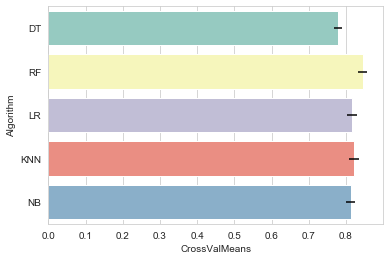

In [95]:
#using my defined function to see the performance of each selected ML algorith and visualize it by bar plot and using accuracy metric.
[classifiers, estNames] = createEstimators()
obtainCVRegressionResults(X_train, y_train, 'accuracy', estNames, classifiers)

# With "F1" as the metric


   CrossValMeans  CrossValStds Algorithm
0       0.481053      0.025941        DT
1       0.523381      0.049833        RF
2       0.383902      0.045523        LR
3       0.459507      0.045614       KNN
4       0.439547      0.041528        NB 



,CrossValMeans,CrossValStds,Algorithm
0,0.481053,0.025941,DT
1,0.523381,0.049833,RF
2,0.383902,0.045523,LR
3,0.459507,0.045614,KNN
4,0.439547,0.041528,NB


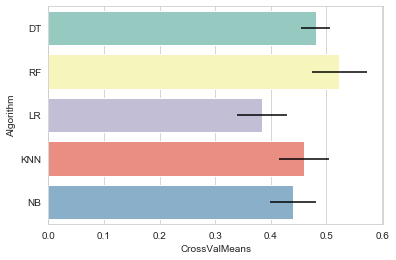

In [96]:
## using my defined function to see the performance of each selected ML algorith and visualize it by bar plot and using f1 metric.
[classifiers, estNames] = createEstimators()
obtainCVRegressionResults(X_train, y_train, 'f1', estNames, classifiers)

# Modelling/ Prediction

With both metrics, we can see that Random Forest classifier is the winner among the 5 techniques. RF achieves an average accuracy of around 84% in 10-fold CV. The DT is second best performing classifier with respect to both metrics. The other three classifiers, i.e. LR, KNN and NB, show good performance when Accuracy metric is used. Even better than DT. However, as soon as the scoring metric is changed to F1, then all three are performing very poorly. This means that they are not strong enough to capture the fact that the target classes are unbalanced. 
Therefore, I selected RF as the best classifier and will use it for the prediction stage.

In prediction stage, we will use the model of the choice based on CV analysis in the last stage, to predict the results for the test set. For this, I will first train (i.e. fit) a RF classifier on the training set and will then use the trained (i.e. fitted) model to predict the binary classes for the test set. This is done in the code below


In [97]:
#Selecting rondom forest based on our previous analysis of selected algorithm for our prediction
#using predict method of random forest classifier class to predict on X_test
#Using confusion matrix to show it's performance.

from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier(random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
test_accuracy= (sum(conf_matrix[i][i] for i in [0, 1])/sum(conf_matrix[i][j] for i in [0, 1] for j in [0, 1])) * 100
Error_rate = ((conf_matrix[0][1]+ conf_matrix[1][0])/sum(conf_matrix[i][j] for i in [0, 1] for j in [0, 1])) * 100
print("Test accuracy in RF in test is: {0}".format(test_accuracy))
print("Error rate is equal to: {0}% ".format(Error_rate))

[[1904   85]
 [ 283  178]]
Test accuracy in RF in test is: 84.9795918367347
Error rate is equal to: 15.020408163265305% 


As we can see in the code, after training and prediction steps, I printed the confusion matric between the predicted classes and the actual classes of the test data. From the confusion matric, we can see that our model has accuracy of 86.28% and error rate of 13.17%.

# Production

creating a hypothetical customer to show an example of our prediction on a new data point

In [98]:
customer_data = pd.DataFrame({'id': 123456, 'CreditScore': [725.0], 'Balance': [10832.0], 'HasCrCard': [0], 
                              'IsActiveMember': [1], 'Geography_Germany': [0],'Geography_Spain': [0], 'Gender_Female': [1], 
                              'Age_imp': [38], 'Tenure_imp': [3], 'NumOfProducts_imp': [2],'Income_imp': [93258.0]})

#Data Preparation for Prediction: This needs to be designed and implemented by the Data Engineer
customer_id = customer_data.iloc[0, 0]
X_customer = customer_data.iloc[:, 1:].values
X_customer = sc.transform(X_customer)

#Prediction using the trained model
y_customer = classifier.predict(X_customer)

#Broadcat the prediction results for the end user
if y_customer[0] == 0:
    print("The customer with id {0} is likely to stay with bank".format(customer_id))
else:
    print("The customer with id {0} is likely to leave bank".format(customer_id))

The customer with id 123456 is likely to stay with bank
